# Task 1: Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------

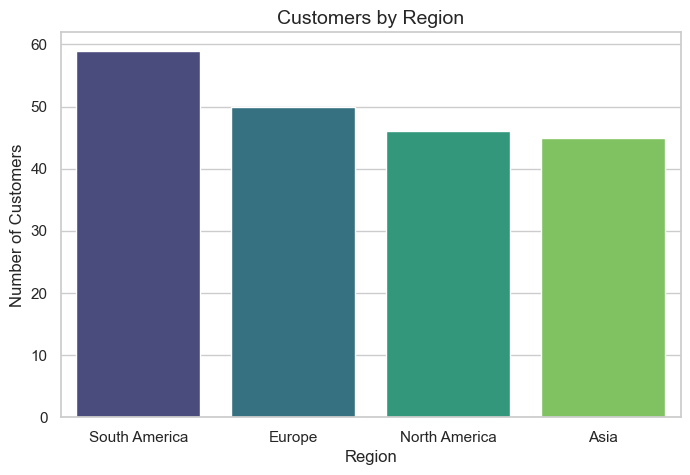

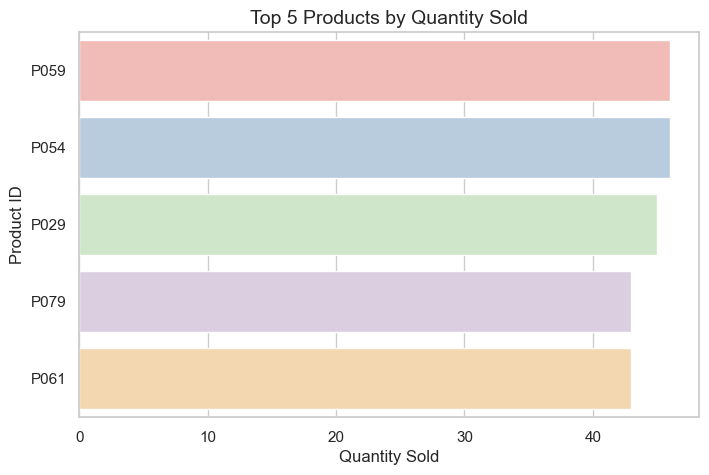

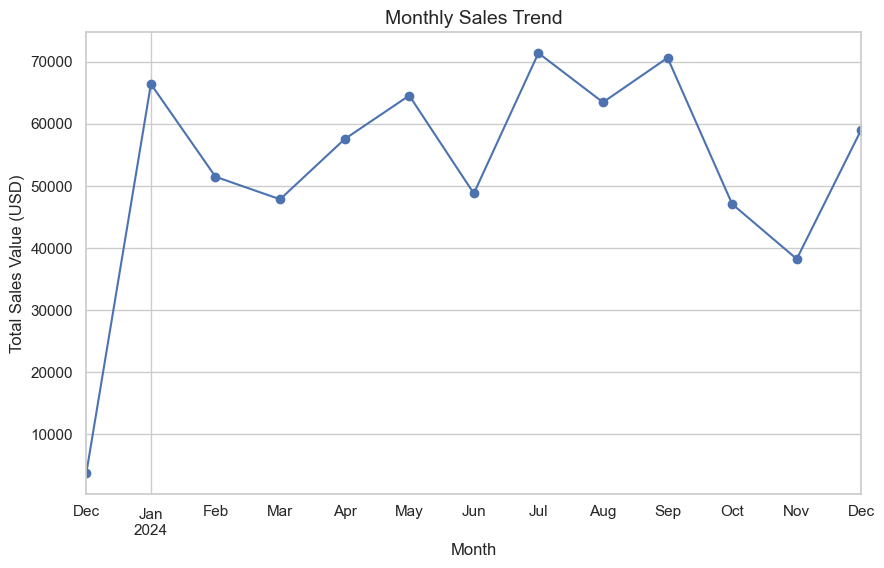

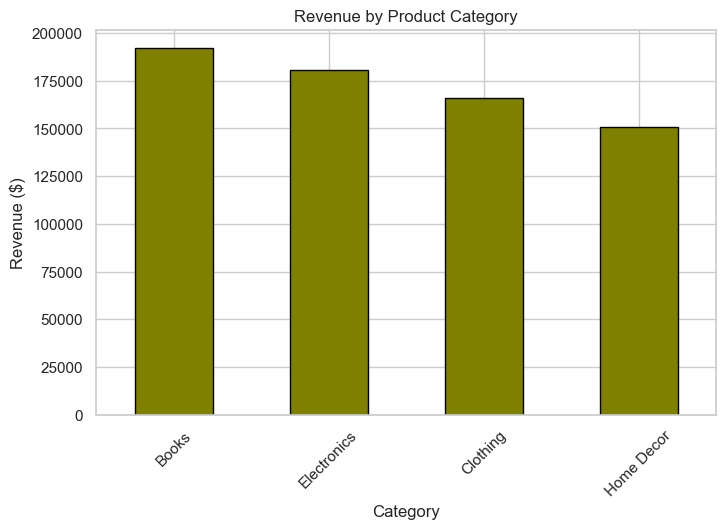

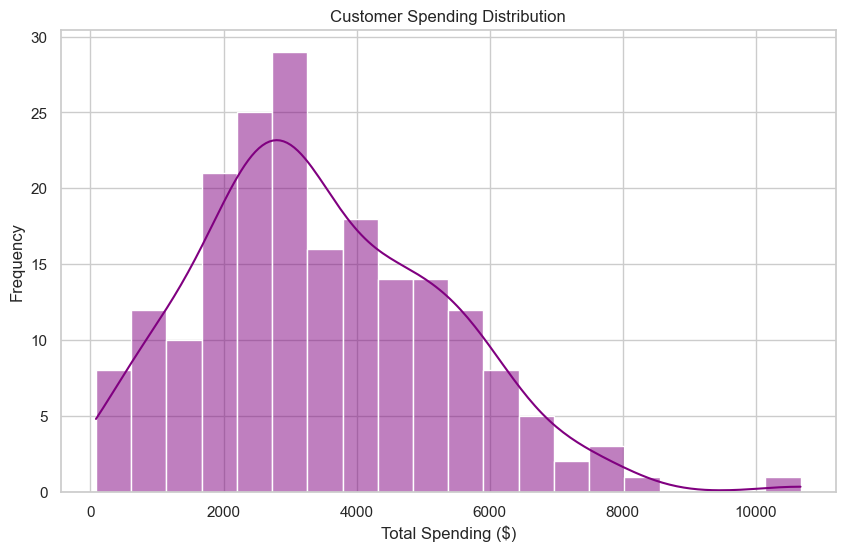

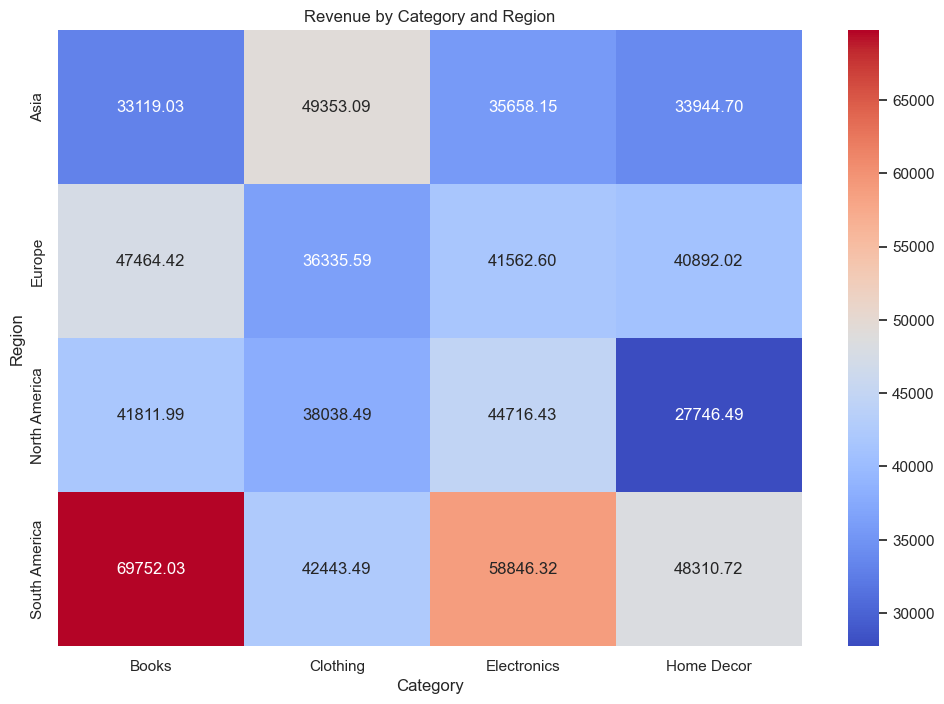

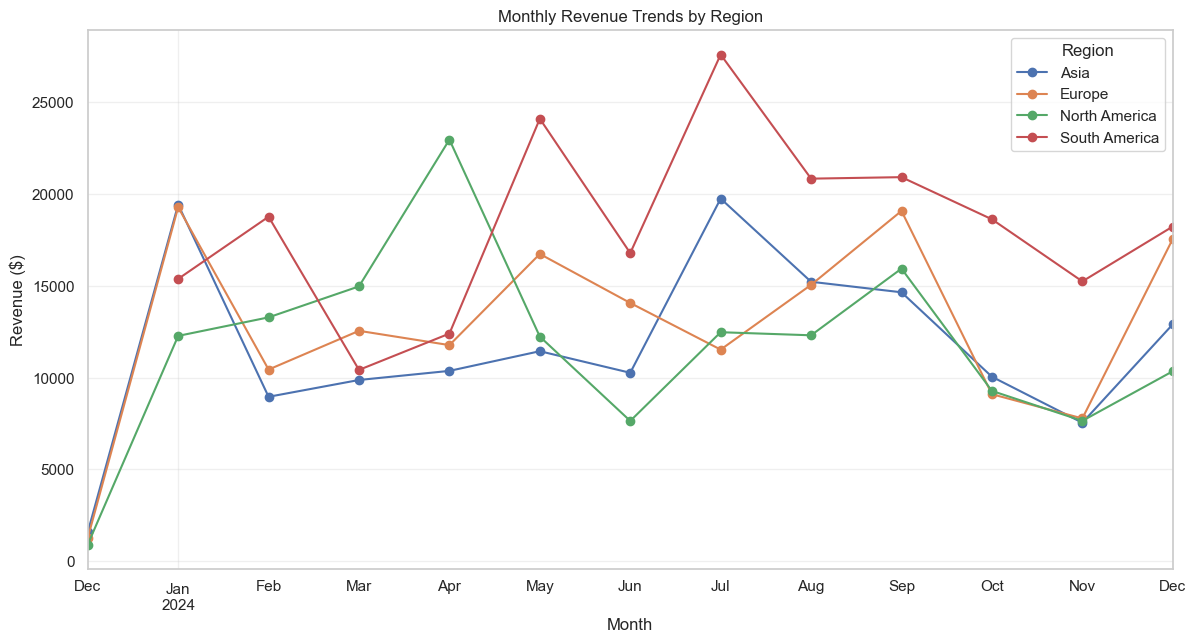

In [2]:
# Data Science Assignment: eCommerce Transactions Analysis

import os
os.environ["OMP_NUM_THREADS"] = "1"

# Importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

sns.set(style="whitegrid")

# Loading the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")
# Displaying the first few rows of each dataset to understand their structure
customers_head = customers.head()
products_head = products.head()
transactions_head = transactions.head()
# Inspect datasets
print(customers.info(),"\n")
print(products.info(),"\n")
print(transactions.info())
# Data Cleaning
# Converting date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
print(customers.isnull().sum(),"\n")
print(products.isnull().sum(),"\n")
print(transactions.isnull().sum(),"\n")
print(customers.describe(include='all'),"\n")
print(products.describe(include='all'),"\n")
print(transactions.describe(include='all'),"\n")
print(customers.duplicated().sum(),"\n",
      products.duplicated().sum(),"\n",
      transactions.duplicated().sum())
print(customers.columns.tolist(),"\n\n",
products.columns.tolist(),"\n\n",
transactions.columns.tolist())
print(customers.shape,"\n",
products.shape,"\n",
transactions.shape)
# Analyzing customers by region
customers_by_region = customers['Region'].value_counts()

customers_by_region.head()
# Analyzing top-selling products and categories by quantity sold
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5)
top_categories = products.loc[products['ProductID'].isin(top_products.index), 'Category'].value_counts()

print(top_products.head(),"\n\n", 
      top_categories.head())
# Analyzing transaction trends over time (Monthly)
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('TransactionMonth')['TotalValue'].sum()

monthly_sales
# Revenue by product category

category_revenue = (transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().sort_values(ascending=False))
category_revenue
# Customer spending distribution

customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
print(customer_spending.describe())
# Plotting Customers by Region
plt.figure(figsize=(8, 5))
sns.barplot(x=customers_by_region.index, y=customers_by_region.values, palette='viridis',hue=customers_by_region.index,legend=False)
plt.title("Customers by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

# Plotting Top 5 Products by Quantity Sold
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='Pastel1',hue=top_products.index, orient="h")
plt.title("Top 5 Products by Quantity Sold", fontsize=14)
plt.xlabel("Quantity Sold", fontsize=12)
plt.ylabel("Product ID", fontsize=12)
plt.show()

# Plotting Monthly Sales Trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind="line", marker="o", color="b")
plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales Value (USD)", fontsize=12)
plt.grid(True)
plt.show()

# EDA: Revenue by product category
category_revenue = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
plt.figure(figsize=(8, 5))
category_revenue.sort_values(ascending=False).plot(kind='bar', color='olive', edgecolor='black')
plt.title("Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()

# EDA: Customer spending distribution
customer_spending = transactions.groupby('CustomerID')['TotalValue'].sum()
plt.figure(figsize=(10, 6))
sns.histplot(customer_spending, kde=True, color='purple', bins=20)
plt.title("Customer Spending Distribution")
plt.xlabel("Total Spending ($)")
plt.ylabel("Frequency")
plt.show()


top_categories_region = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')
region_category_revenue = top_categories_region.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()

# Heatmap for Revenue by Category and Region
plt.figure(figsize=(12, 8))
sns.heatmap(region_category_revenue, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Revenue by Category and Region")
plt.ylabel("Region")
plt.xlabel("Category")
plt.show()


transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_region_sales = transactions.merge(customers, on='CustomerID').groupby(['Region', 'TransactionMonth'])['TotalValue'].sum().unstack()

monthly_region_sales.T.plot(figsize=(14, 7), marker='o')
plt.title("Monthly Revenue Trends by Region")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.legend(title="Region")
plt.grid(alpha=0.3)
plt.show()


# Task 2: Lookalike Model.

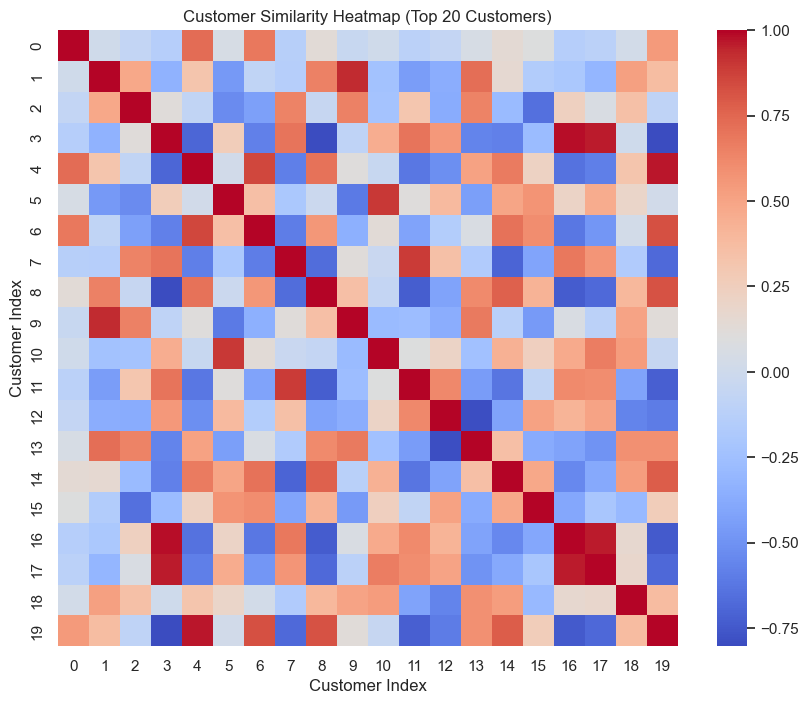

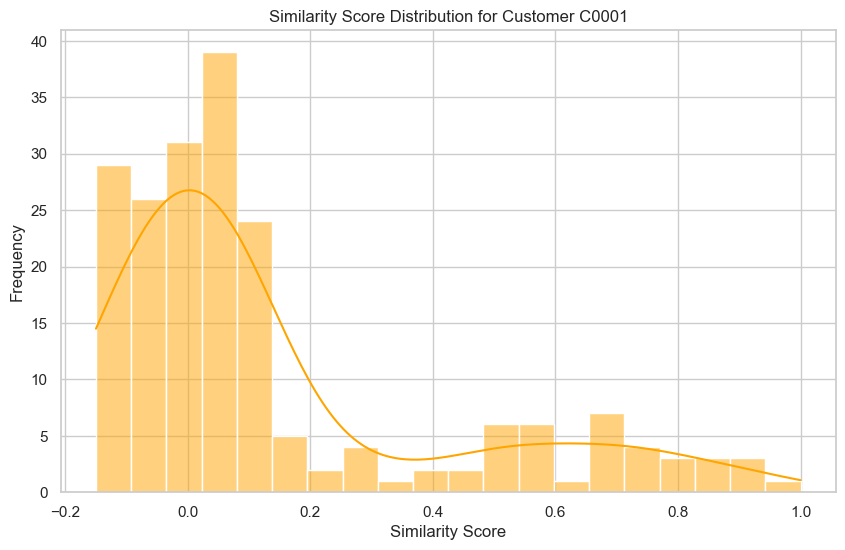

Lookalike recommendations saved to 'lookalike_results.csv'


(Region
 South America    29.5
 Europe           25.0
 North America    23.0
 Asia             22.5
 Name: proportion, dtype: float64,
 Category          Books
 TotalValue    192147.47
 Name: 0, dtype: object,
 count    100.000000
 mean     267.551700
 std      143.219383
 min       16.080000
 25%      147.767500
 50%      292.875000
 75%      397.090000
 max      497.760000
 Name: Price, dtype: float64,
 1850.0,
 1000,
 689.9955600000001)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Merge datasets for Lookalike Model
transactions_products = transactions.merge(products, on="ProductID", how="left")
merged_data = transactions_products.merge(customers, on="CustomerID", how="left")
merged_data.rename(columns={'Price_y': 'Price'}, inplace=True)

# Re-aggregate customer transaction details
customer_summary = merged_data.groupby("CustomerID").agg({
    'TotalValue': 'sum',  # Total transaction value per customer
    'Quantity': 'sum',   # Total quantity purchased per customer
    'Price': 'mean',     # Average price of products purchased
    'Category': lambda x: x.mode()[0]  # Most purchased category
}).reset_index()
# Encode categorical features and standardize numerical ones
customer_summary_encoded = pd.get_dummies(customer_summary, columns=['Category'])
scaler = StandardScaler()
numerical_features = ['TotalValue', 'Quantity', 'Price']
customer_summary_encoded[numerical_features] = scaler.fit_transform(customer_summary_encoded[numerical_features])
# Compute similarity scores for the first 20 customers
first_20_customers = customer_summary_encoded.iloc[:20]
similarity_scores = cosine_similarity(first_20_customers.iloc[:, 1:], customer_summary_encoded.iloc[:, 1:])

# Added code to generate and save a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_scores[:20, :20], cmap="coolwarm", annot=False, cbar=True)
plt.title("Customer Similarity Heatmap (Top 20 Customers)")
plt.xlabel("Customer Index")
plt.ylabel("Customer Index")
plt.savefig("customer_similarity_heatmap.png")  # Save the visualization
plt.show()

# Example: Distribution of similarity scores for a specific customer
customer_index = 0  # Change index for different customers
plt.figure(figsize=(10, 6))
sns.histplot(similarity_scores[customer_index], bins=20, kde=True, color='orange')
plt.title(f"Similarity Score Distribution for Customer {customer_summary_encoded.iloc[customer_index]['CustomerID']}")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

# Generate Lookalike recommendations
lookalike_results = {}
for idx, customer_id in enumerate(first_20_customers['CustomerID']):
    similar_customers = sorted(
        list(enumerate(similarity_scores[idx])),
        key=lambda x: x[1],
        reverse=True
    )[1:4]  # Top 3 lookalikes excluding the customer itself
    lookalike_results[customer_id] = [(customer_summary_encoded.iloc[i]['CustomerID'], score) for i, score in similar_customers]

lookalike_results
# Save results to CSV
recommendations_csv = []
for customer, similar_customers in lookalike_results.items():
    for similar_customer, score in similar_customers:
        recommendations_csv.append({
            "CustomerID": customer,
            "SimilarCustomerID": similar_customer,
            "SimilarityScore": score
        })

pd.DataFrame(recommendations_csv).to_csv("lookalike_results.csv", index=False)
print("Lookalike recommendations saved to 'lookalike_results.csv'")

# Monthly Transactions Trend
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M').astype(str)
monthly_trend = transactions.groupby('TransactionMonth').size().reset_index(name='Count')

# Top Product Categories by Total Sales
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().reset_index()
category_sales = category_sales.sort_values(by='TotalValue', ascending=False)

# Deriving Business Insights

# Insight 1: Customer Region Distribution
region_distribution = customers['Region'].value_counts(normalize=True) * 100

# Insight 2: High Sales Categories
top_category = category_sales.loc[category_sales['TotalValue'].idxmax()]

# Insight 3: Product Pricing
price_stats = products['Price'].describe()

# Insight 4: Monthly Sales Growth
monthly_sales_growth = (monthly_trend['Count'].iloc[-1] - monthly_trend['Count'].iloc[0]) / monthly_trend['Count'].iloc[0] * 100

# Insight 5: Transaction Volume
total_transactions = transactions.shape[0]
avg_transaction_value = transactions['TotalValue'].mean()

region_distribution, top_category, price_stats, monthly_sales_growth, total_transactions, avg_transaction_value

## Task 3: Customer Segmentation/Clustering
performing customer segmentation using clustering techniques.

Prepare Data for Clustering:
Encode categorical variables and scale numerical features.
            
Choose Clustering Algorithm:
KMeans clustering algorithm and the optimal number of clusters using the Elbow Method and Davies-Bouldin (DB) Index.

Cluster Visualization:
Visualize clusters using 2D plots.
            
Evaluate Clustering:
Calculate and report clustering metrics, including the DB Index.

In [6]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
# Aggregate transaction data for each customer
customer_transaction_agg = transactions.groupby('CustomerID').agg(
    TotalSpent=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum'),
    TotalTransactions=('TransactionID', 'nunique'),
    AvgTransactionValue=('TotalValue', 'mean'),
    AvgQuantityPerTransaction=('Quantity', 'mean'),
).reset_index()


# Preprocess data for clustering
customer_features = pd.merge(customers, customer_transaction_agg, on='CustomerID', how='inner')
clustering_data = customer_features.drop(columns=['CustomerID', 'CustomerName', 'Region', 'SignupDate'])
scaled_data = scaler.fit_transform(clustering_data)

In [8]:
# Evaluate optimal number of clusters using Davies-Bouldin Index
inertia = []
db_scores = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(scaled_data, kmeans.labels_))

In [9]:
# Determine the optimal number of clusters based on the Davies-Bouldin Index
optimal_clusters = cluster_range[db_scores.index(min(db_scores))]
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Minimum Davies-Bouldin Index: {min(db_scores)}")

Optimal Number of Clusters: 9
Minimum Davies-Bouldin Index: 1.022951986409254


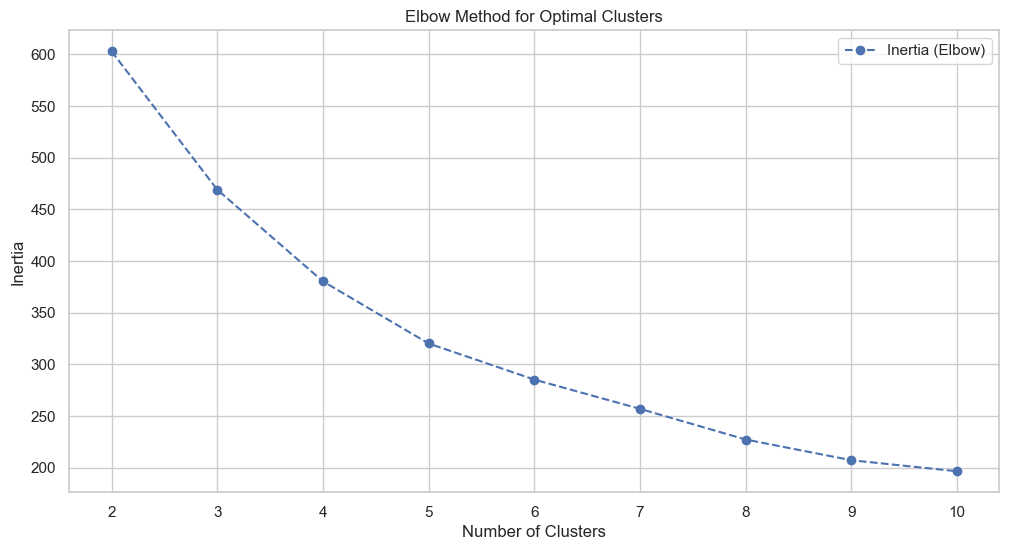

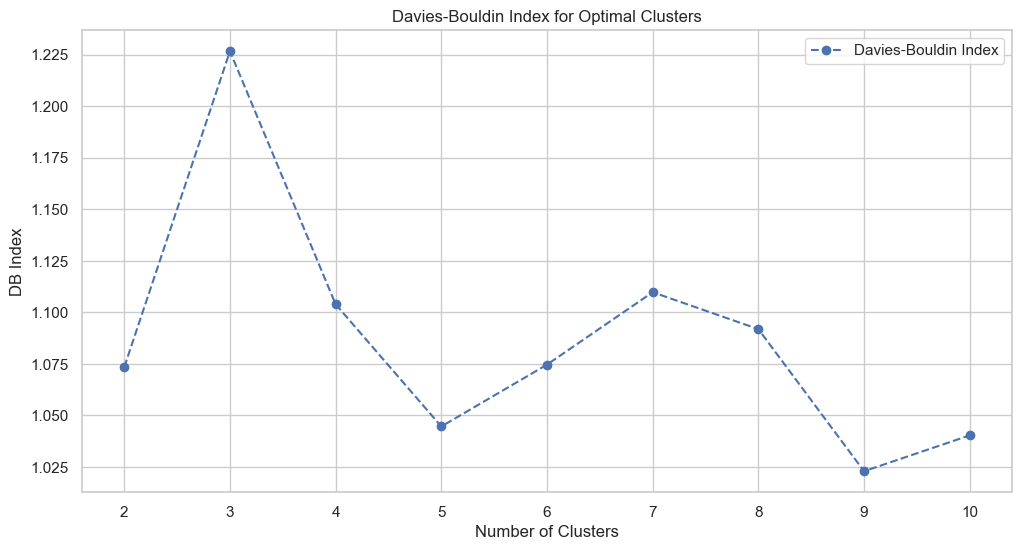

In [10]:
# Plot Elbow Method results
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', label='Inertia (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot Davies-Bouldin Index results
plt.figure(figsize=(12, 6))
plt.plot(cluster_range, db_scores, marker='o', linestyle='--', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.legend()
plt.show()

In [11]:
# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(scaled_data)

In [12]:
# Summarize cluster characteristics using the correct cluster column
cluster_summary = customer_features.groupby('Cluster').agg(
    AvgSpent=('TotalSpent', 'mean'),
    AvgQuantity=('TotalQuantity', 'mean'),
    TotalCustomers=('CustomerID', 'count')
).reset_index()

print("Cluster Profiles:")
print(cluster_summary)


Cluster Profiles:
   Cluster     AvgSpent  AvgQuantity  TotalCustomers
0        0  4931.240000    17.379310              29
1        1  1657.325000     5.750000              24
2        2  5486.414737    18.684211              19
3        3  3736.682667     9.800000              15
4        4   742.274375     4.375000              16
5        5  6875.244375    24.750000              16
6        6  2101.494667    11.133333              15
7        7  2961.490000    11.413043              46
8        8  3015.285263    12.368421              19


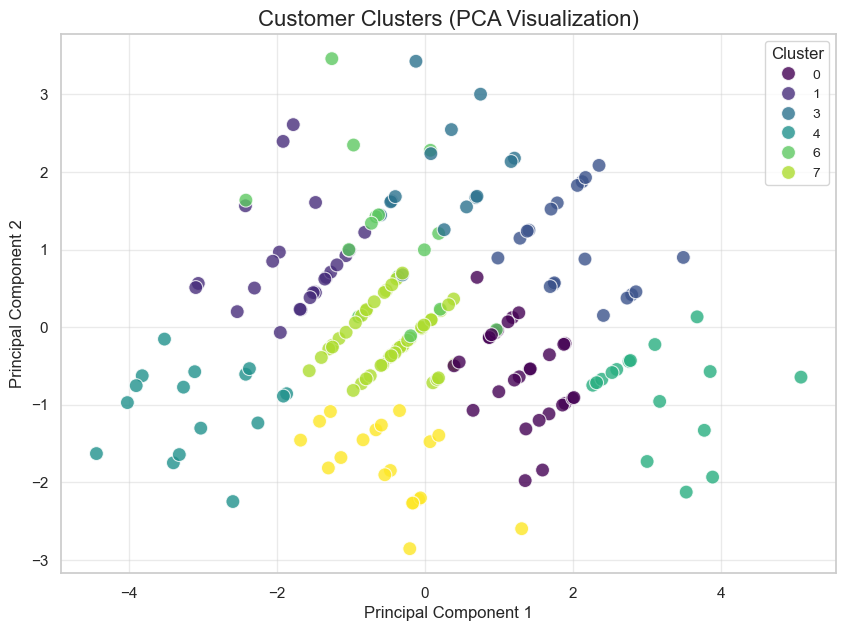

In [13]:
# Visualize the clusters using PCA
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(scaled_data)

visualization_data = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
visualization_data['Cluster'] = customer_features['Cluster']

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Cluster', data=visualization_data,
    palette='viridis', s=100, alpha=0.8
)
plt.title('Customer Clusters (PCA Visualization)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(alpha=0.4)
plt.show()


In [14]:
# Report clustering metrics
db_index = davies_bouldin_score(scaled_data, customer_features['Cluster'])
silhouette_avg = silhouette_score(scaled_data, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")


Davies-Bouldin Index: 1.022951986409254
Silhouette Score: 0.2833820931201712


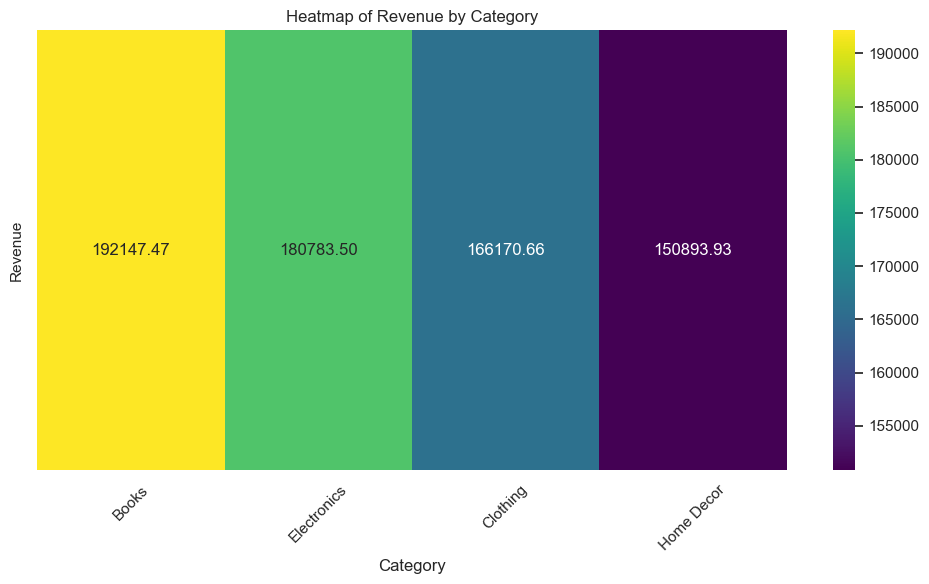

In [15]:
category_revenue_sorted = category_revenue.sort_values(ascending=False)

# Convert to DataFrame for heatmap compatibility
heatmap_data = pd.DataFrame(category_revenue_sorted).reset_index()
heatmap_data.columns = ['Category', 'Revenue']

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data[['Revenue']].T,  # Transpose for horizontal display
    annot=True,                  # Annotate with revenue values
    fmt=".2f",                   # Format annotation to 2 decimal points
    cmap="viridis",              # Color palette for the heatmap
    cbar=True,                   # Show color bar
    xticklabels=heatmap_data['Category'],  # Set category names as labels
    yticklabels=['Revenue'],     # Label the single row
)

# Add titles and labels
plt.title("Heatmap of Revenue by Category")
plt.xlabel("Category")
plt.ylabel("")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()